In [9]:
##Investors and regulators sentiments and views

In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys 
from bs4 import BeautifulSoup
import requests 
import bs4 as bs 
from textblob.classifiers import NaiveBayesClassifier
import csv
import random
import urllib
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize

C:\Users\Vineet\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
driver = webdriver.Chrome("C:/Users/Vineet/Documents/ISB-H/Big data collection/group assign/chromedriver")

In [3]:
import re

def cleanhtml(raw_html):
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', raw_html)
  return cleantext

####view of world bank

In [12]:

driver.get("https://economictimes.indiatimes.com/markets/stocks/news/cryptocurrencies-are-like-ponzi-schemes-world-bank-chief-says/articleshow/62830841.cms")

In [13]:
pagesrc = driver.page_source
soup = BeautifulSoup(pagesrc,'lxml')
text = soup.find_all('div',class_ = "Normal")

In [14]:
text = str(text)

In [15]:

text = text.replace('\n','')

#text = re.sub('[^ a-zA-Z0-9]', '', text)
text = cleanhtml(text)

In [16]:

lines = text.split('.')

In [17]:
import pandas as pd
df = pd.DataFrame({'documents':lines})
print (df)

                                           documents
0  [By Shelly HaganThe head of the World Bank com...
1  “In terms of using Bitcoin or some of the cryp...
2   “It’s still not really clear how it’s going t...
3  ”The development lender is “looking really car...
4   There’s hope the technology could be used in ...
5  The value of cryptocurrencies soared in 2017 b...
6  While cryptocurrency technology has the potent...
7  In a speech this week, Bank of International S...
8   Federal Reserve Chair Jerome Powell has said ...
9                                                  ]


In [18]:
import time    # to time the ops

import nltk

t0 = time.time()    # start timer
tokens = nltk.word_tokenize(text)   # tokenizing
t1_tagged = nltk.pos_tag(tokens)   # POSTagging
t1 = time.time()

time.taken = round(t1-t0, 3)
print(time.taken)
print("\n")    # print newline

# view POSTagged sample output
t1_tagged[:50]

3.569




[('[', 'NN'),
 ('By', 'IN'),
 ('Shelly', 'NNP'),
 ('HaganThe', 'NNP'),
 ('head', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('World', 'NNP'),
 ('Bank', 'NNP'),
 ('compared', 'VBN'),
 ('cryptocurrencies', 'NNS'),
 ('to', 'TO'),
 ('“', 'VB'),
 ('Ponzi', 'NNP'),
 ('schemes', 'NNS'),
 (',', ','),
 ('”', 'VBP'),
 ('the', 'DT'),
 ('latest', 'JJS'),
 ('financial', 'JJ'),
 ('voice', 'NN'),
 ('to', 'TO'),
 ('raise', 'VB'),
 ('questions', 'NNS'),
 ('about', 'IN'),
 ('the', 'DT'),
 ('legitimacy', 'NN'),
 ('of', 'IN'),
 ('digital', 'JJ'),
 ('currencies', 'NNS'),
 ('such', 'JJ'),
 ('as', 'IN'),
 ('Bitcoin.', 'NNP'),
 ('“', 'NNP'),
 ('In', 'IN'),
 ('terms', 'NNS'),
 ('of', 'IN'),
 ('using', 'VBG'),
 ('Bitcoin', 'NNP'),
 ('or', 'CC'),
 ('some', 'DT'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('cryptocurrencies', 'NNS'),
 (',', ','),
 ('we', 'PRP'),
 ('are', 'VBP'),
 ('also', 'RB'),
 ('looking', 'VBG'),
 ('at', 'IN')]

In [19]:
# making panda from list
import pandas as pd
labels = ['token', 'POSTag']

# using from_records() to build the DF
t1_df = pd.DataFrame.from_records(t1_tagged, columns = labels)

t1_df[:5]   # view a few rows of the DF

,token,POSTag
0,[,NN
1,By,IN
2,Shelly,NNP
3,HaganThe,NNP
4,head,NN


In [20]:
import nltk.stem.lancaster as lan_stem

stem1 = lan_stem.LancasterStemmer()

# stemming all the 11k+ tokens in ibmcorpus
newlist=[]   #define empty list 2 populate

t0 = time.time()
for token1 in t1_df.token:
    newlist.append(stem1.stem(token1))

stemmed_df = pd.DataFrame({'stemmed_token':newlist})

# now concatenate DFs by colm n display
t1_stemmed_df = pd.concat([t1_df, stemmed_df], axis=1)
t1_stemmed_df[:19]

,token,POSTag,stemmed_token
0,[,NN,[
1,By,IN,by
2,Shelly,NNP,shel
3,HaganThe,NNP,haganth
4,head,NN,head
5,of,IN,of
6,the,DT,the
7,World,NNP,world
8,Bank,NNP,bank
9,compared,VBN,comp


In [21]:


# Py's wordnet lemmatizer
import nltk.stem
wordnet_lemm = nltk.stem.WordNetLemmatizer()

In [22]:
# lemmatizing the ibm corpus
lemm_list=[]


for token1 in t1_df.token:
    lemm_list.append(wordnet_lemm.lemmatize(token1))

lemmed_df = pd.DataFrame({'lemmed_token':lemm_list})
# lemmed_df[:9]

# now concatenate by colm and display
t1_lemmed_df = pd.concat([t1_stemmed_df,lemmed_df], axis=1)
t1_lemmed_df[:25]

,token,POSTag,stemmed_token,lemmed_token
0,[,NN,[,[
1,By,IN,by,By
2,Shelly,NNP,shel,Shelly
3,HaganThe,NNP,haganth,HaganThe
4,head,NN,head,head
5,of,IN,of,of
6,the,DT,the,the
7,World,NNP,world,World
8,Bank,NNP,bank,Bank
9,compared,VBN,comp,compared


In [23]:
from textblob import TextBlob

In [24]:
t2 = TextBlob(text)

In [25]:
t2.sentiment  # subjectivity = 0 means fully objective sentence.


Sentiment(polarity=0.10753968253968253, subjectivity=0.4757936507936507)

In [4]:
def process(text1):
    text1 = str(text1)
    text1 = text1.replace('\n','')
    text1 = cleanhtml(text1)
    lines1 = text1.split('.')
    df = pd.DataFrame({'documents':lines1})
    sent = SentimentIntensityAnalyzer()
    df["Compounded_polarity"] = df.documents.apply(lambda x: sent.polarity_scores(x)['compound'])
    df["Neutral"] = df.documents.apply(lambda x: sent.polarity_scores(x)['neu'])
    df["Negative"] = df.documents.apply(lambda x: sent.polarity_scores(x)['neg'])
    df["Positive"] = df.documents.apply(lambda x: sent.polarity_scores(x)['pos'])
    df["Sentiment"] = ""
    df.loc[df.Compounded_polarity == 0, "Sentiment"] = 0
    df.loc[df.Compounded_polarity > 0, "Sentiment"] = 1
    df.loc[df.Compounded_polarity < 0, "Sentiment"] = -1
    df_n = df.iloc[:,[0,5]]
    data = [tuple(x) for x in df_n.values]
    return(data)


###views of global central banks

In [7]:
driver.get("https://economictimes.indiatimes.com/markets/stocks/news/how-cryptocurrencies-split-global-central-banks/articleshow/62715511.cms")

In [8]:
pagesrc = driver.page_source
soup = BeautifulSoup(pagesrc,'lxml')
text1 = soup.find_all('div',class_ = "Normal")


In [28]:
globalbanks =  process(text1)
globalbanks = pd.DataFrame(globalbanks)
globalbanks.rename(columns={'0': 'text'}, inplace=True)
globalbanks.rename(columns={'1': 'Sentiment'}, inplace=True)

In [30]:
globalbanks

,0,1
0,"[Nine years since the birth of Bitcoin, centra...",0
1,There is fear after a $500-million exchange h...,-1
2,Here’s a wrap-up of how the world’s largest c...,1
3,"Jerome Powell, the new Fed chairman said in 2...",-1
4,” Powell said there are “meaningful” challenge...,-1
5,EURO AREA: Tulip-LikeThe European Central Bank...,-1
6,Vice President Vitor Constancio said in Septe...,0
7,Colleague Benoit Coeure has warned about Bitc...,-1
8,ECB President Mario Draghi said in November t...,-1
9,CHINA: Cracking DownChina has made it clear: t...,1


In [ ]:
##views of RBI


In [34]:
driver.get("https://economictimes.indiatimes.com/markets/stocks/news/anger-shock-confusion-as-rbi-bars-banks-from-cryptocurrencies/articleshow/63638799.cms")

In [35]:
pagesrc = driver.page_source
soup = BeautifulSoup(pagesrc,'lxml')
text = soup.find_all('div',class_ = "Normal")


In [36]:
def process(text1):
    text1 = str(text1)
    text1 = text1.replace('\n','')
    text1 = cleanhtml(text1)
    lines1 = text1.split('.')
    df = pd.DataFrame({'documents':lines1})
    sent = SentimentIntensityAnalyzer()
    df["Compounded_polarity"] = df.documents.apply(lambda x: sent.polarity_scores(x)['compound'])
    df["Neutral"] = df.documents.apply(lambda x: sent.polarity_scores(x)['neu'])
    df["Negative"] = df.documents.apply(lambda x: sent.polarity_scores(x)['neg'])
    df["Positive"] = df.documents.apply(lambda x: sent.polarity_scores(x)['pos'])
    df["Sentiment"] = ""
    df.loc[df.Compounded_polarity == 0, "Sentiment"] = 0
    df.loc[df.Compounded_polarity > 0, "Sentiment"] = 1
    df.loc[df.Compounded_polarity < 0, "Sentiment"] = -1
    df_n = df.iloc[:,[0,5]]
    data = [tuple(x) for x in df_n.values]
    return(data)


In [37]:
rbi = process(text)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(12,6))
df.groupby('sentiment').sentiment.count().plot.bar(ylim=0)
plt.show()

In [3]:
##views of investors

In [38]:
driver.get("https://www.google.co.in")

In [39]:
elem = driver.find_element_by_css_selector("#lst-ib")

In [40]:
# sending keys below is like entering keys via keyboard

elem.clear()    # first clear any pre-populated text in the input field
elem.send_keys("investors views on cryptocurrencies")     # type "pycon" for py conf into search-text field 
elem.send_keys(Keys.RETURN)  
time.sleep(3)
assert "No results found." not in driver.page_source

In [41]:
link1 = driver.find_element_by_xpath('.//*[@id="rso"]/div[1]/div/div/div/div/h3/a')
link1.click()

In [42]:
driver.find_element_by_class_name('l-submain')

<selenium.webdriver.remote.webelement.WebElement (session="f1fa0fe2ab330f13d5dffd598e5b37da", element="0.3025915574142499-1")>

In [43]:
pagesrc = driver.page_source
soup = BeautifulSoup(pagesrc,'lxml')
text = soup.find_all('p')

In [44]:
investors = process(text)

In [45]:
driver.back()

In [ ]:
# experts views 

In [46]:
elem = driver.find_element_by_css_selector("#lst-ib")
elem.clear()    # first clear any pre-populated text in the input field
elem.send_keys("expert views on cryptocurrency")     # type "pycon" for py conf into search-text field 
elem.send_keys(Keys.RETURN)  
time.sleep(3)
assert "No results found." not in driver.page_source

In [47]:
link1 = driver.find_element_by_xpath('.//*[@id="rso"]/div[1]/div/div/div/div/h3/a')
link1.click()

In [48]:
pagesrc = driver.page_source
soup = BeautifulSoup(pagesrc,'lxml')
text = soup.find_all('p')

In [49]:
experts = process(text)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(12,6))
df.groupby('sentiment').sentiment.count().plot.bar(ylim=0)
plt.show()

In [ ]:
#financial regulators views on cryptocurrency

In [50]:
driver.back()
elem = driver.find_element_by_css_selector("#lst-ib")
elem.clear()    # first clear any pre-populated text in the input field
elem.send_keys("financial regulators views on cryptocurrency")     # type "pycon" for py conf into search-text field 
elem.send_keys(Keys.RETURN)  
time.sleep(3)
assert "No results found." not in driver.page_source

In [51]:
link1 = driver.find_element_by_xpath('.//*[@id="rso"]/div[1]/div/div/div/div/h3/a')
link1.click()
pagesrc = driver.page_source
soup = BeautifulSoup(pagesrc,'lxml')
text = soup.find_all('p')

In [52]:
regulators_views = process(text)

In [53]:
driver.back()
elem = driver.find_element_by_css_selector("#lst-ib")
elem.clear()    # first clear any pre-populated text in the input field
elem.send_keys("financial regulators on cryptocurrency")     # type "pycon" for py conf into search-text field 
elem.send_keys(Keys.RETURN)  
time.sleep(3)
assert "No results found." not in driver.page_source

In [ ]:
##big article on crypto

In [56]:
driver.back()
elem = driver.find_element_by_css_selector("#lst-ib")
elem.clear()    # first clear any pre-populated text in the input field
elem.send_keys("big article on cryptocurrency")     # type "pycon" for py conf into search-text field 
elem.send_keys(Keys.RETURN)  
time.sleep(3)
assert "No results found." not in driver.page_source
link1 = driver.find_element_by_xpath('.//*[@id="rso"]/div[1]/div/div/div/div/h3/a')
link1.click()
pagesrc = driver.page_source
soup = BeautifulSoup(pagesrc,'lxml')
text = soup.find_all('p')

In [57]:
views1 = process(text)

In [ ]:
##institutional-investors views

In [58]:
driver.get("https://medium.com/john-pfeffer/an-institutional-investors-take-on-cryptoassets-690421158904")

In [60]:

pagesrc = driver.page_source
soup_obj = BeautifulSoup(pagesrc, "lxml")
topic_12 = soup_obj.find_all("p")


In [61]:
inv = process(topic_12)

In [62]:
final = inv+views1+rbi+regulators_views+experts+globalbanks

In [63]:
len(final) ##total - 1373 documents

1373

In [ ]:
#A Naive Bayes machine learning classifier

In [64]:

# generate indices randomly for train and test
indices_train = sorted(random.sample(range(len(final)), round(len(final)*.70)))
indices_test = list(set(range(len(final)))  - set(indices_train))


In [65]:
# now subset the full dataset into training and test
train_data = [final[i] for i in indices_train]
test_data = [final[i] for i in indices_test]


In [66]:
len(train_data)  #961

961

In [131]:
len(test_data)  #386

386

In [67]:
cl = NaiveBayesClassifier(train_data)
nb_accuracy = cl.accuracy(test_data)
print(nb_accuracy)  ### 78% accuracy
#time taken - 15 seconds  

0.7815533980582524


In [68]:
###classify
cl.classify('The latest annual report of the International Monetary Fund has concluded that cryptocurrency does not pose a threat to global economic stability')

1

In [69]:
cl.classify('cryptocurrency poses “limited threat” to the fiat financial system')

0

In [70]:
cl.classify('the report is optimistic about the future application of blockchain technology')

0

In [71]:
cl.classify('But they do pose new risks to central banks, including to their control of money supply and price stability, and the transmission of monetary policy, Cetinkaya said')

-1

In [72]:
df =  pd.DataFrame(list(final), columns=['documents','sentiment'])

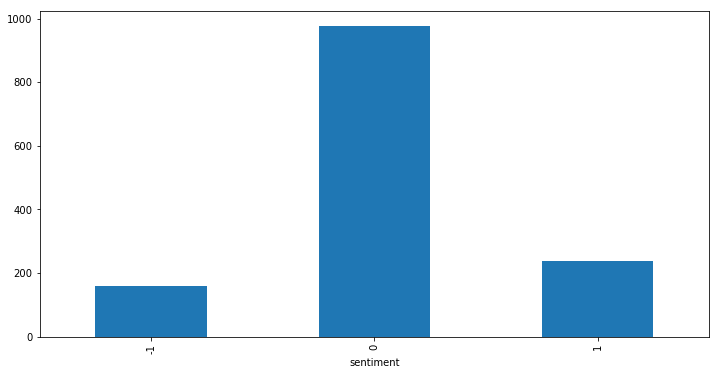

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(12,6))
df.groupby('sentiment').sentiment.count().plot.bar(ylim=0)
plt.show()

In [74]:

df.groupby('sentiment').sentiment.count()
#976 - Most of them are neutral comments
#237 - positive
#160 - negative

sentiment
-1    160
 0    976
 1    237
Name: sentiment, dtype: int64

In [ ]:
#adding positive and negative view on cryptocurrencies

In [75]:
def scraping(text):
    driver.get(text)
    pagesrc = driver.page_source
    soup_obj = BeautifulSoup(pagesrc, "lxml")
    text = soup_obj.find_all("p")
    return(text)

In [76]:
text = scraping("https://coinpupil.com/altcoins/advantages-disadvantages-of-cryptocurrency/")

In [77]:
t1 = scraping("https://economictimes.indiatimes.com/wealth/invest/7-reasons-why-you-should-not-invest-in-bitcoins-cryptocurrencies/articleshow/60891341.cms")

In [78]:
t2 = scraping("https://www.investinblockchain.com/7-signs-bad-cryptocurrency/")

In [79]:
t3 = scraping("http://thecircular.org/cryptocurrencies-bad-sides-bitcoin/")

In [80]:
one = process(t1)
two = process(t2) 
three = process(t3)

In [81]:
pros_Cons = process(text)

In [82]:
#adding to final tuple
final = final + one + two+ three + pros_Cons

In [83]:

# generate indices randomly for train and test
indices_train = sorted(random.sample(range(len(final)), round(len(final)*.70)))
indices_test = list(set(range(len(final)))  - set(indices_train))

# now subset the full dataset into training and test
train_data = [final[i] for i in indices_train]
test_data = [final[i] for i in indices_test]

cl = NaiveBayesClassifier(train_data)
nb_accuracy = cl.accuracy(test_data)
print(nb_accuracy)
####73% accuracy

0.7372881355932204


In [84]:
cl.classify('Issues such as hacking incidents can cause investors to lose all of their investment quickly')

1

In [92]:
x1 = pd.Series(df["documents"].tolist()).astype(str)

In [94]:
words.replace('"', '')

0       [IMPORTANT NOTICE: This document is intended f...
1        The views expressed in this document are not,...
2        Recipients of this document should do their o...
3        This document is not an offer, nor the solici...
4       , Amidst the indiscriminate speculation, sensa...
5        As investors, we look for things that generat...
6        This paper evaluates the extent to which cryp...
7        It aims to assess the potential future value ...
8        By design, it does not dwell on the significa...
9        These risks are very real, and are well docum...
10       Temporarily setting them aside allows for an ...
11      , I write not from the perspective of a trader...
12       The paper thus focuses entirely on long-term ...
13       It also assumes the reader has some familiari...
14      , Blockchain technology has the potential to d...
15       The open-source nature of public blockchain p...
16       While tens or perhaps hundreds of billions of...
17       The o

In [97]:

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import string
import random
import gensim
from gensim import corpora
from gensim.corpora import Dictionary
import pandas as pd
import re

In [117]:

tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
#en_stop = get_stop_words('en')
stop = set(stopwords.words('english'))
lemma = WordNetLemmatizer()
# list for tokenized documents in loop
texts = []  
# clean and tokenize document string
raw = text.lower()
raw = cleanhtml(raw)
tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    #stopped_tokens = [i for i in tokens if not i in en_stop]
stopped_tokens = [i for i in tokens if not i in stop]
    
    # stem tokens
stemmed_tokens = [lemma.lemmatize(i) for i in stopped_tokens]
    
    #remove single letters
    #stemmed_tokens = [w for w in stemmed_tokens if re.sub('(\\b[A-Za-z] \\b|\\b [A-Za-z]\\b)','',stemmed_tokens)]
    
    #remove number
    #stemmed_tokens = [w for w in stemmed_tokens if re.sub(r'\d+',stemmed_tokens)]
    
    
    # add tokens to list
texts.append(stemmed_tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
doc_term_matrix = [dictionary.doc2bow(text) for text in texts]

In [56]:
##textblob

In [108]:
from textblob import TextBlob
text = str(text)

In [110]:
test1 = cleanhtml(text)
test1 = TextBlob(test1)


In [111]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Vineet\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [112]:
# POSTagging with the blob
tags_list = test1.tags  # penn treebank style tags
print(tags_list[:9])

[('[', 'RB'), ('1', 'CD'), ('Source', 'NN'), ('for', 'IN'), ('News', 'NNP'), ('Research', 'NNP'), ('and', 'CC'), ('Analysis', 'NNP'), ('on', 'IN')]


In [113]:
# noun phrase extraction
np_list = test1.noun_phrases  
print(np_list)

['[ #', 'source', 'analysis', 'cryptocurrency', 'cryptocurrency', 'digital currency', 'standard currency', 'central banks', 'cryptocurrency', 'regular physical currencies', 'different purposes', 'money transactions', 'bitcoin', 'de-facto crypto', 'bitcoin.', 'digital currency', 'cryptographic technology', 'blockchain technology', 'real money', 'bank account', 'vice versa.', 'doesn ’ t', 'physical tangible form', '’ s', 'currency ’ s', '’ s', '’ t touch', 'different forms', 'bitcoins', 'bitcoins', 'knowing', 'big reason', '“ shitcoins ”', 'good use-cases', 'privacy coins', 'chain cryptos', 'chain operations', 'everyday currencies', 'digital currency', 'business owner', 'specific crypto', '’ re buying', 'long term', 'bitcoin', 'significant reception', 'major drawback', 'high political restriction', 'russia', 'china', 'bitcoins', 'outstanding rate.', 'singapore', 'switzerland', 'clearly', 'positive aspects outshine', '’ s ascension', 'untraceable transactions', 'your', 'email address', 'r

In [114]:
# Sentiment-an with textblob
## yields polarity between (-1,1) & a measure of subjectivity (0 to 1)
test1.sentiment  # subjectivity = 0 means fully objective sentence.
print(test1.sentiment)
print("\n")
for sentence in test1.sentences:
    x = sentence.sentiment

Sentiment(polarity=0.09889039613354683, subjectivity=0.45377197003909336)


